In [1]:
import numpy as np
import matplotlib.pyplot as plt

from apdist.utils import plot_warping 
from apdist.geometry import SquareRootSlopeFramework as SRSF
from apdist.distances import AmplitudePhaseDistance as dist

Amplitude phase distance edge case. Sobol example is from in-silico sobol replicate 0, baseline case is from in silico baseline replicate 0

In [3]:
q_grid = np.load('q_grid.npy')
q_grid_scaled = np.load('q_grid_scaled.npy')
I_sobol = np.load('I_sobol.npy')
I_baseline = np.load('I_baseline.npy')
target_I = np.load('targetI.npy')

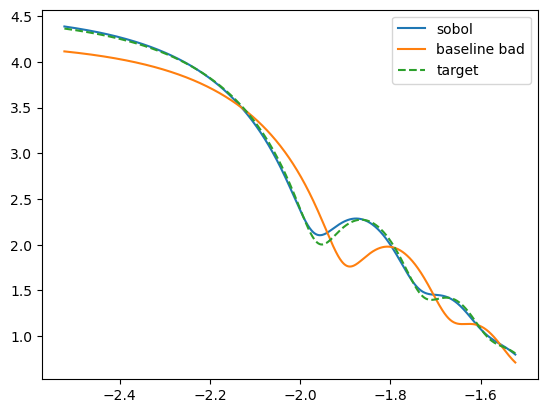

In [4]:
fig, ax = plt.subplots()

ax.plot(q_grid, I_sobol, label = 'sobol')
ax.plot(q_grid, I_baseline, label = 'baseline bad')

ax.plot(q_grid, target_I, ls = '--', label = 'target')
ax.legend()

In [5]:
optim_kwargs = {"optim":"DP", "grid_dim":10}

## Sobol best sample

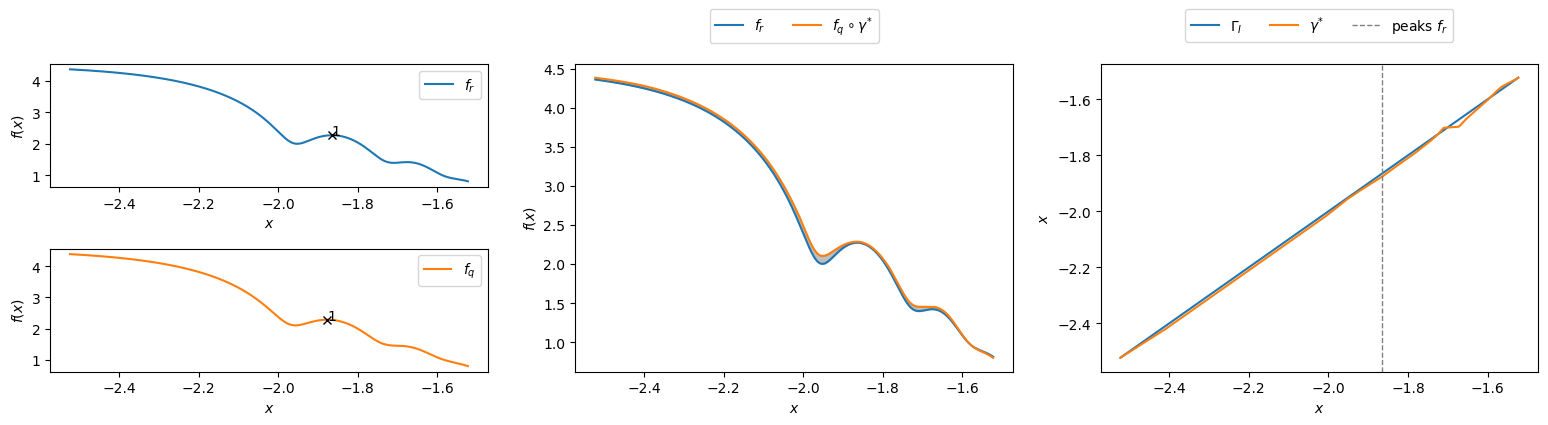

In [8]:
srsf = SRSF(q_grid_scaled)
q_ref = srsf.to_srsf(target_I)
q_query = srsf.to_srsf(I_sobol)
gamma = srsf.get_gamma(q_ref, q_query, **optim_kwargs)
f_query_gamma = srsf.warp_f_gamma(I_sobol, gamma)
plot_warping(q_grid, target_I, I_sobol, f_query_gamma, gamma)
plt.show()

In [9]:
dist(q_grid_scaled, target_I, I_sobol, **optim_kwargs)

(0.2200580508943256, 0.14815613141501183)

## Baseline optimized 'bad' sample

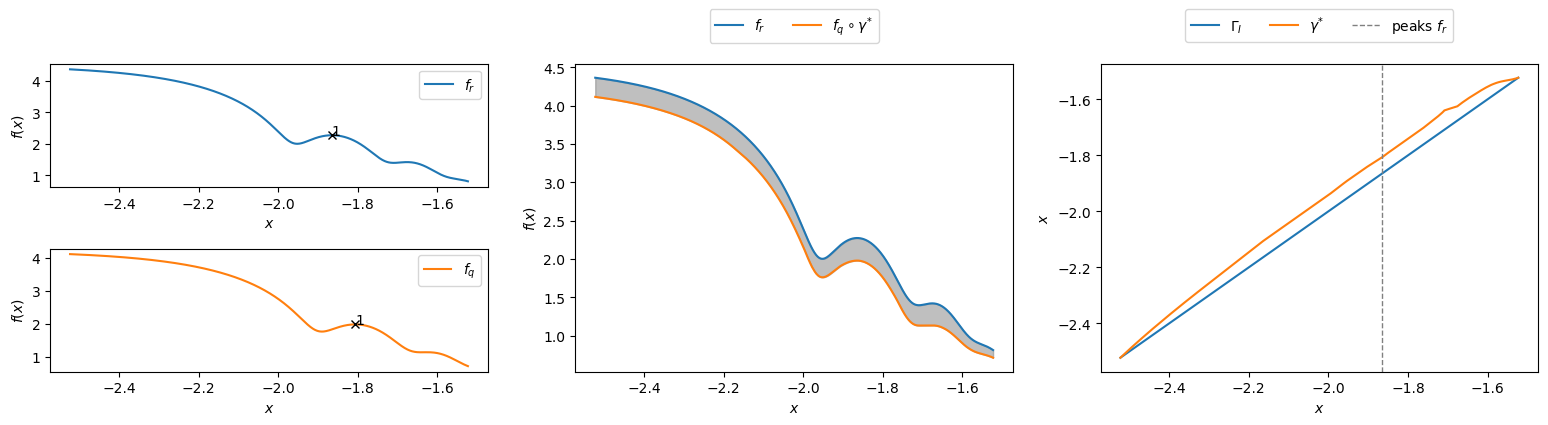

In [11]:
srsf = SRSF(q_grid_scaled)
q_ref = srsf.to_srsf(target_I)
q_query = srsf.to_srsf(I_baseline)
gamma = srsf.get_gamma(q_ref, q_query, **optim_kwargs)
f_query_gamma = srsf.warp_f_gamma(I_baseline, gamma)
plot_warping(q_grid, target_I, I_baseline, f_query_gamma, gamma)
plt.show()

In [12]:
dist(q_grid_scaled, target_I, I_baseline, **optim_kwargs)

(0.18604145767109964, 0.1350732271310796)